In [3]:
import pandas as pd
import numpy as np
import seaborn as sys
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
import re
from uszipcode import SearchEngine

In [4]:
df2 = pd.read_csv('tax_income.csv') 

In [5]:
df = pd.read_csv("Crime_Data_from_2010_to_Present.csv")
df = df.drop_duplicates()
# df["SHOOTING"].fillna("N", inplace = True)
# df["Lat"].replace(-1, None, inplace=True)
# df["Long"].replace(-1, None, inplace = True)

In [6]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [27]:
geolocator = Nominatim(user_agent="111")
df_location = df[["LAT", "LON"]]
# df_location["ZIP_CODE"] = df_location.apply(lambda row:geolocator.reverse(row["LAT"], row["LON"]).address)
# search = SearchEngine(simple_zipcode=False)
# result = search.by_coordinates(39.122229, -77.133578, radius=30, returns=5)
# print(result[0].zipcode)
def zip_return(row):
    reg = re.compile(r"(90\d\d\d)")
    combine_loc = str(row['LAT']) + ", " + str(row['LON'])
    value = geolocator.reverse(combine_loc,timeout=15).raw["address"]["postcode"]
    try:
        value = re.search(r'(90\d\d\d)', value).group(0)
    except:
        value = -1
    print(value)
    return value

def test_zip(row):
    result = search.by_coordinates(row["LAT"], row["LON"], radius=10, returns=1)
    print(result[0].zipcode)
    return result[0].zipcode

df_location["ZIP_CODE"] = df_location.apply(zip_return, axis = 1)

GeocoderQuotaExceeded: ('HTTP Error 429: Too Many Requests', 'occurred at index 0')

In [44]:
data = df[["DR_NO", "AREA ","AREA NAME", "DATE OCC", "Crm Cd","LAT", "LON"]].dropna()

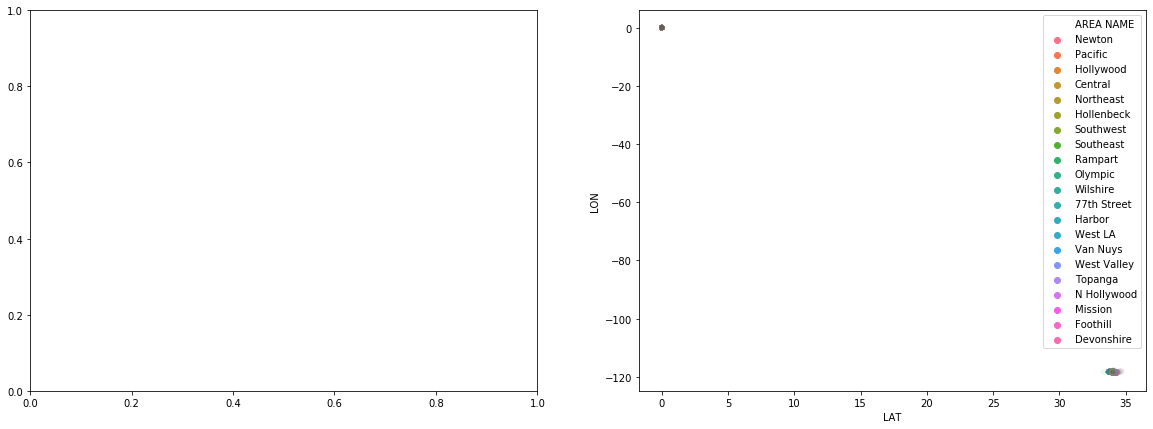

In [51]:
# security measurement
fig, axes = plt.subplots(1,2, figsize = (20,7))
data.LAT.replace(-1, None, inplace=True)
data.LON.replace(-1, None, inplace=True)
 
sys.scatterplot(x = "LAT",  y= "LON", hue = "AREA NAME", alpha= 0.01, data = data)

In [107]:
map_data = df[["DR_NO","AREA ", "Crm Cd","LON", "LAT"]]
map_data = map_data[map_data["Crm Cd"]==110]
map_data.head()

,DR_NO,AREA,Crm Cd,LON,LAT
113,100100811,1,110,-118.2476,34.0461
404,100101605,1,110,-118.2427,34.0435
524,100104269,1,110,-118.2430,34.0458
2488,100110330,1,110,-118.2491,34.0517
3459,100112967,1,110,-118.2468,34.0407


In [154]:
start_lat, start_long = map_data["LAT"].mean(), map_data["LON"].mean()
map_sample = folium.Map(location = [map_data["LAT"].mean(), map_data['LON'].mean()])
mark = MarkerCluster()
for row in map_data.itertuples():
    mark.add_child(folium.Marker(location = [row.LAT, row.LON]))
map_sample.add_child(mark)

In [149]:
map_data_multi = df[["DR_NO","AREA ", "Crm Cd", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3","Crm Cd 4","LON", "LAT"]].dropna()
map_data_multi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 8422 to 2065519
Data columns (total 9 columns):
DR_NO       104 non-null int64
AREA        104 non-null int64
Crm Cd      104 non-null int64
Crm Cd 1    104 non-null float64
Crm Cd 2    104 non-null float64
Crm Cd 3    104 non-null float64
Crm Cd 4    104 non-null float64
LON         104 non-null float64
LAT         104 non-null float64
dtypes: float64(6), int64(3)
memory usage: 8.1 KB


In [153]:
start_lat, start_long = map_data_multi["LAT"].mean(), map_data_multi["LON"].mean()
map_sample_multi = folium.Map(location = [map_data_multi["LAT"].mean(), map_data_multi['LON'].mean()])
mark = MarkerCluster()
for row in map_data_multi.itertuples():
    mark.add_child(folium.Marker(location = [row.LAT, row.LON]))
map_sample_multi.add_child(mark)

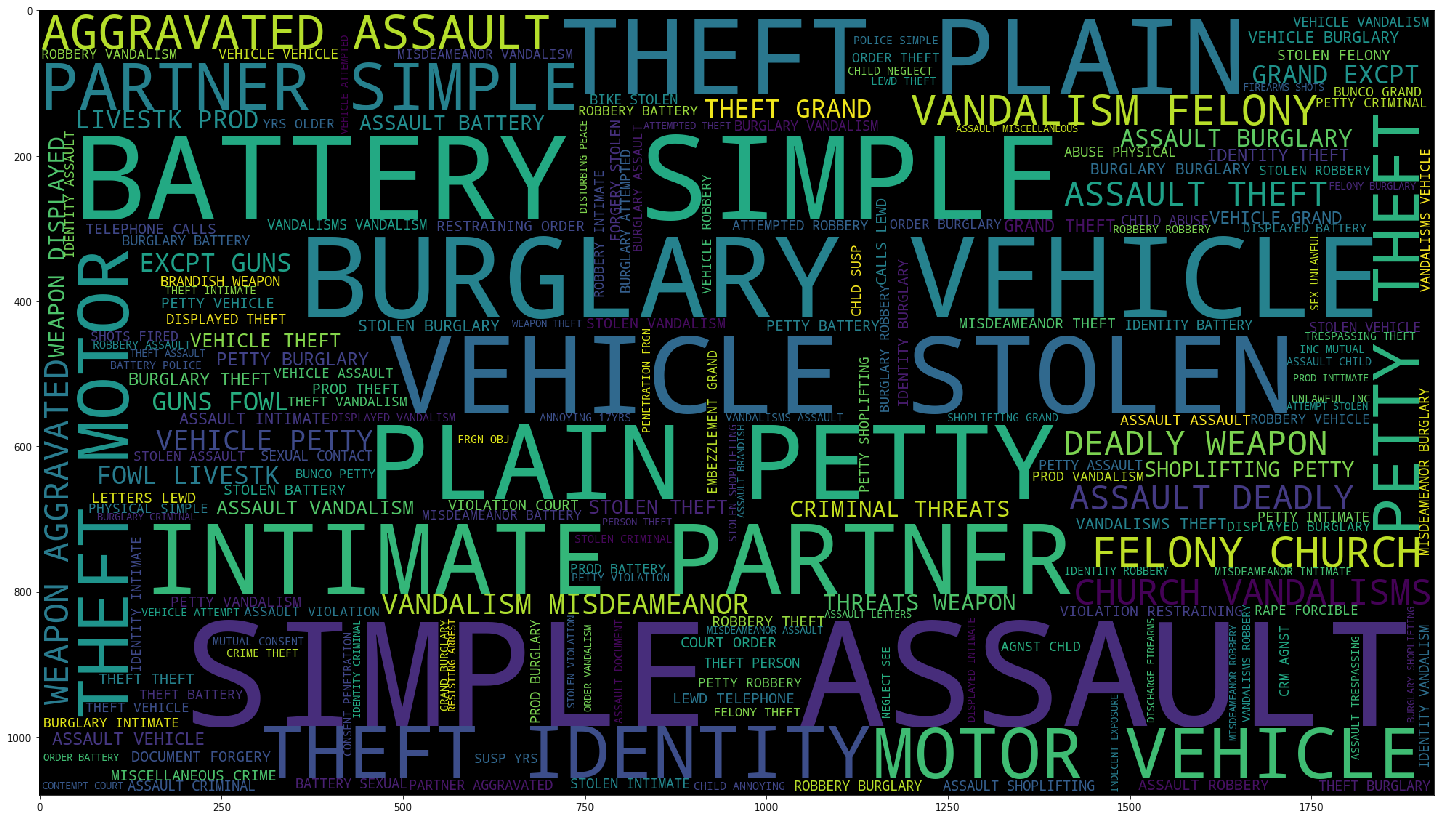

In [25]:
# Word Cloud
plt.figure(figsize = (25, 15))
temp_word = " ".join(df["Crm Cd Desc"].tolist())
word_cloud = WordCloud(
        background_color = "black",
        width = 1920,
        height= 1080
    ).generate(temp_word)
plt.imshow(word_cloud)
plt.axis("off")
plt.savefig("graph.png")
plt.show()